In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from gensim.models import Word2Vec

#### Import Word2Vec Model:

In [2]:
model = Word2Vec.load("word2vec_model.model")
print("Model loaded successfully.")

Model loaded successfully.


#### Ward’s Hierarchical Agglomerative Clustering Method:

In [3]:
# Load the CSV file
df = pd.read_csv('/Users/77y2vec/Desktop/first_paper_code/results/filtered/filtered_data_alg.csv')  # Adjust this to the correct file path

# Extract words from the CSV file starting from the second row
selected_words = df.iloc[1:, 0].tolist()  # Assumes words are in the first column starting from the second row

# Check if these words are in the model's vocabulary and extract their vectors
vectors = [model.wv[word] for word in selected_words if word in model.wv]

# Perform hierarchical clustering using the Ward method
Z = linkage(vectors, method='ward')


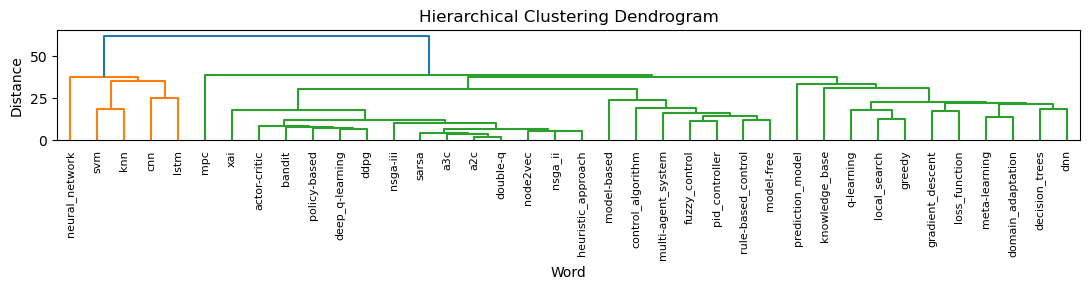

Dendrogram saved to /Users/77y2vec/Desktop/first_paper_code/results/clustering/alg_dendrogram.png


In [4]:
# Define the file save path
save_path = '/Users/77y2vec/Desktop/first_paper_code/results/clustering/'
if not os.path.exists(save_path):
    os.makedirs(save_path)  # Create directory if it does not exist

plt.figure(figsize=(11, 3))
dendrogram(Z, labels=selected_words, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Word')
plt.ylabel('Distance')
plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plot_file = os.path.join(save_path, 'alg_dendrogram.png')
plt.savefig(plot_file, format='png', dpi=600)  # Save before showing
plt.show()
plt.close()

print(f"Dendrogram saved to {plot_file}")